In [74]:
import pandas as pd
import matplotlib.pyplot as plt

## Conteo

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_temporalidad(datos, titulo):
    fig, ax = plt.subplots(figsize=(12, 5))

    # Detectar frecuencia esperada
    modo = titulo.lower()
    fechas = pd.to_datetime(datos.index)

    if modo == "diario":
        rango = pd.date_range(fechas.min(), fechas.max(), freq='D')
    elif modo == "semanal":
        rango = pd.date_range(fechas.min(), fechas.max(), freq='W-MON')
    elif modo == "mensual":
        rango = pd.date_range(fechas.min(), fechas.max(), freq='MS')
    else:
        rango = fechas  # sin reindexado si no se reconoce el modo

    # Reindexar para incluir fechas faltantes con valor 0
    datos = datos.reindex(rango, fill_value=0)

    # Graficar con colores si es diario
    if modo == "diario":
        colores = ['tomato' if fecha.weekday() >= 5 else 'steelblue' for fecha in datos.index]
        ax.bar(datos.index, datos.values, color=colores)
    else:
        datos.plot(kind='bar', ax=ax, color='steelblue')

    ax.set_title(f'Volumen {titulo} de publicaciones')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Número de publicaciones')
    plt.tight_layout()
    plt.show()


In [76]:
df = pd.read_csv("../empleos-espanoles-eures-2025.csv", sep=";")
df['timestamp'] = pd.to_datetime(df["timestamp"], format="%d/%m/%Y")
df.head()

,id,timestamp,titulo,ocupacion,descripcion,provincia,tipo_contrato
0,https://europa.eu/eures/portal/jv-se/jv-detail...,2025-10-10,AGENTE COMERCIAL DE SEGUROS (REF.: 6891),corredor de seguros/corredora de seguros,TAREAS:Prospección de nuevos asegurados/as.Pla...,Asturias,Contrato
1,https://europa.eu/eures/portal/jv-se/jv-detail...,2025-10-10,PERSONAL CONDUCCIÓN DE CAMIONES RÍGIDOS Y GÓND...,Conductor de vehículo de carga/conductora de v...,DESCRIPCIÓN: Se necesita cubrir cuatro puestos...,Huesca,Contrato
2,https://europa.eu/eures/portal/jv-se/jv-detail...,2025-10-10,EDUCADORES SOCIALES,Trabajador social/trabajadora social,EDUCADOR/A SOCIAL PARA HOGAR EN ARINAGA. FINES...,Las Palmas,Determinado
3,https://europa.eu/eures/portal/jv-se/jv-detail...,2025-10-10,PIZZERO/A (REF. 042025002051),Pizzero/pizzera,FUNCIONES: Elaboración de pizzas REQUISITOS: 2...,Islas Baleares,Determinado
4,https://europa.eu/eures/portal/jv-se/jv-detail...,2025-10-10,INTÉRPRETES DE LA LENGUA DE SIGNOS,intérprete de lengua de signos,INTÉRPRETE DE LENGUA DE SIGNOS PARA PUESTOS EN...,Santa Cruz de Tenerife,Determinado


In [77]:
df = df[df['timestamp'] <= pd.Timestamp("2026-02-01")]

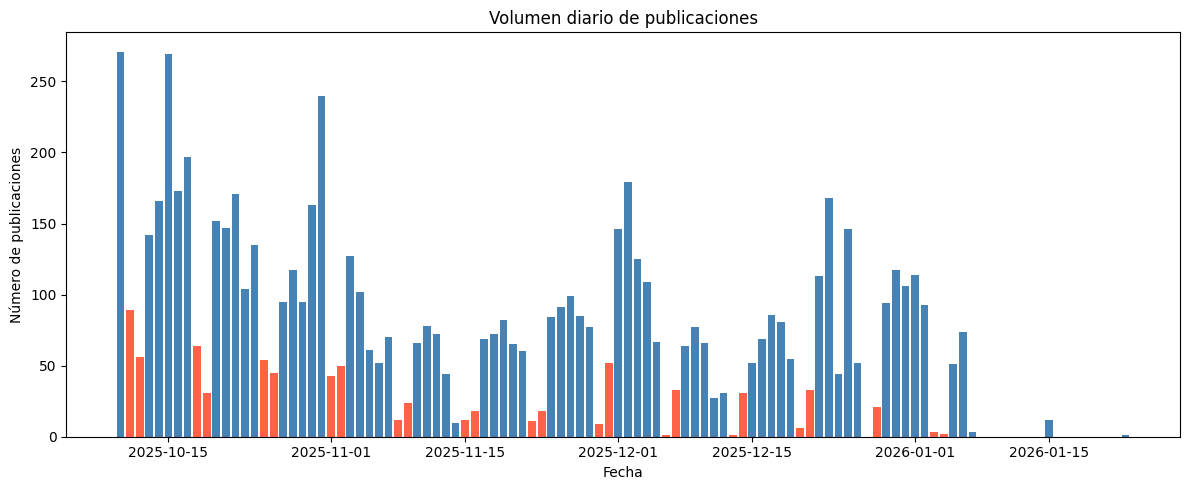

In [78]:
conteo_dia = df.groupby(df['timestamp'].dt.date).size()
plot_temporalidad(conteo_dia, "diario")

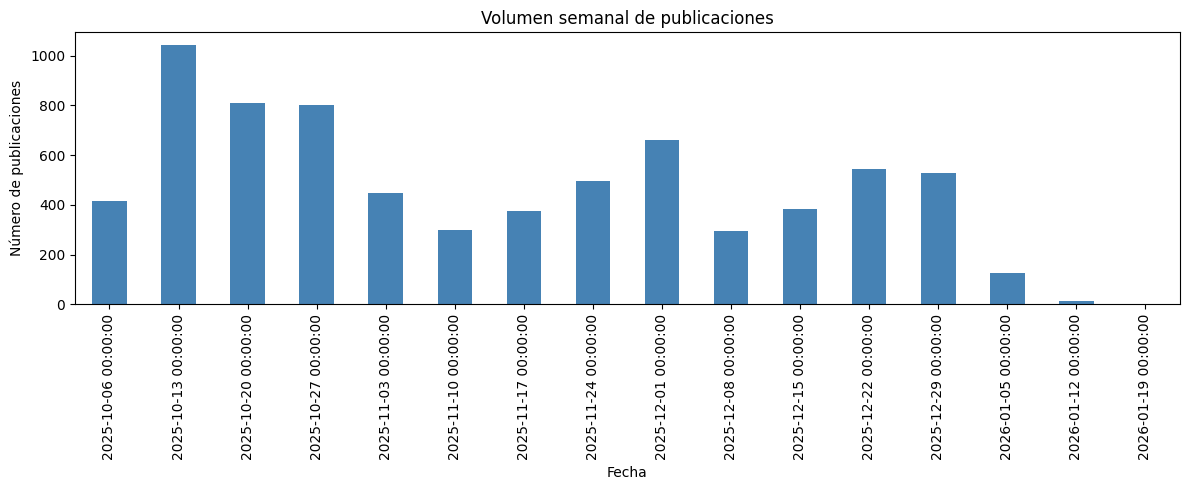

In [ ]:
conteo_semana = df.groupby(df['timestamp'].dt.to_period('W')).size()
conteo_semana.index = conteo_semana.index.to_timestamp()  
plot_temporalidad(conteo_semana, "semanal")

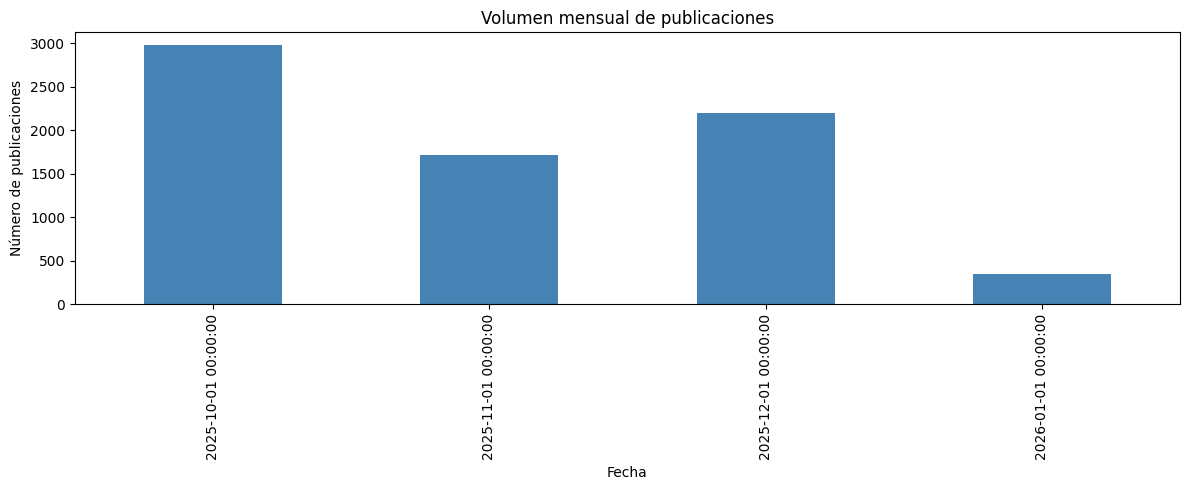

In [81]:
conteo_mes = df.groupby(df['timestamp'].dt.to_period('M')).size()
conteo_mes.index = conteo_mes.index.to_timestamp()
plot_temporalidad(conteo_mes, "mensual")

In [ ]:
df.tipo_contrato.value_counts()

tipo_contrato
Contrato                                  4625
Determinado                               2384
Temporal                                   173
Autónomo                                    51
Self-employed                                4
Puesto de aprendiz                           3
Apprenticeship                               1
Empleo con posibilidad de contratación       1
Name: count, dtype: int64